epoch 20, x1 -2.382563, x2 -0.158591


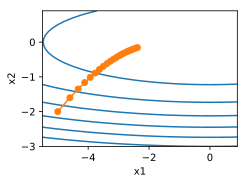

In [2]:
%matplotlib inline
import d2lzh as d2l
import math
from mxnet import nd

# 二维的adagrad算法
def adagrad_2d(x1, x2, s1, s2):
    # 自变量梯度和常数
    g1,g2,eps = 0.2 *x1, 4 * x2, 1e-6
    s1 += g1 ** 2
    s2 += g2 ** 2
    # eta为学习速率
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1,x2):
    return 0.1 * x1 ** 2 + 2 * x2 **2

eta = 0.4
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

epoch 20, x1 -0.002295, x2 -0.000000


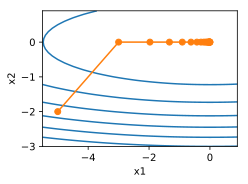

In [3]:
eta = 2 # 提高学习率，自变量更为迅速地逼近了最优解。
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d)) 

In [8]:
features, labels = d2l.get_data_ch7()

def init_adagrad_states():
    s_w = nd.zeros((features.shape[1], 1))
    s_b = nd.zeros(1)
    return (s_w, s_b)

def adagrad(params, states, hyperparams):
    eps = 1e-6
    for p, s in zip(params, states):
        s[:] += p.grad.square() 
        p[:] -= hyperparams['lr'] * p.grad / (s + eps).sqrt()

loss: 0.242900, 0.159134 sec per epoch


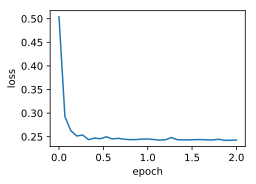

In [9]:
d2l.train_ch7(adagrad, init_adagrad_states(), {'lr': 0.1}, features, labels)

loss: 0.243626, 0.186785 sec per epoch


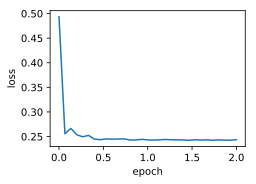

In [10]:
d2l.train_gluon_ch7('adagrad', {'learning_rate': 0.1}, features, labels)

loss: 0.245680, 0.158048 sec per epoch


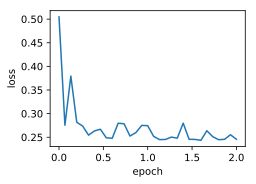

In [12]:
d2l.train_ch7(adagrad, init_adagrad_states(), {'lr': 0.5}, features, labels)